# Data Analyst Associate Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Data Validation
Describe the validation tasks you performed and what you found. Have you made any changes to the data to enable further analysis? Remember to describe what you did for every column in the data. 

# --------------------------------------------------------------------------
# 1. Data Validation
## 1) Reading Dataset

   This study used python to validate the client's dataset. We read CSV dataset and checked to summary of it. Total records are 879 with 9 attributes, which was as explained by Dataset introduction documents. Moreover, dataset did not have any missing data in each column so we did not need to handle missing data.

In [92]:
# Load Packages
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stat # for T-Test
import seaborn as sns
from sklearn.linear_model import LogisticRegression # Logistic Regression ML
from sklearn import metrics
from sklearn.model_selection import train_test_split
import statsmodels.api as sm # Logistic Regression Analysis
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Reading csv from my google drive and Validating dataset.
url = 'https://drive.google.com/file/d/1V5ETozCUBi1dbJ9QzJQNGR5ZiG6QhoR6/view?usp=share_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)
# gat the base database file
print('Missing Data Checking')
print(data.isna().any())


Missing Data Checking
product_id          False
product_category    False
sales               False
price               False
vendor_id           False
pet_size            False
pet_type            False
rating              False
re_buy              False
dtype: bool


   However, product_id is a integer type and sales is object type so we need to convert these columns to correct data type. Product_id should convert to character, and sales should convert integer type.

In [90]:
print('Checking Data types')
print(data.dtypes)

Checking Data types
product_id            int64
product_category     object
sales                object
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object


Finally, this study checked all nominal data. According to the dataset introduction document, the product category has 11 categories, and pet_size has five size categories. Our dataset has the same number of categories in each nominal data, the same as the document. However, Pet_type has six categories in the dataset, so we need to filter 'cat', 'dog', 'fish', and 'bird' according to the document. Product_id and Vendor_id fields are the same numbers of total records, 879.

In [91]:
uq_product_id = data.product_id.unique()
uq_product_ctgr = data.product_category.unique()
uq_vendor_id = data.vendor_id.unique()
uq_pet_type = data.pet_type.unique()
uq_pet_size = data.pet_size.unique()

print('Validate Categorical Variables.')
print('Unique Product id: ' + str(uq_product_id.size))
print('Unique Product Categories: ' + str(uq_product_ctgr.size))
print('Unique Vendor id: ' + str(uq_vendor_id.size))
print('Unique Pet types: ' + str(uq_pet_type.size))
print('Unique Pet Sizes: ' + str(uq_pet_size.size))
print('Total Records: ' + str(data.shape[0]))

Validate Categorical Variables.
Unique Product id: 879
Unique Product Categories: 11
Unique Vendor id: 879
Unique Pet types: 6
Unique Pet Sizes: 5
Total Records: 879


## 2) Validating and Filtering Data for Client requirements
   This study did two steps for validating data. One is cleansing and filtering data for client requirements. The client mentioned that other pet types should not be included in the analysis. 
   Therefore, we filtered only four types of pets: dogs, cats, fish, and birds. Moreover, the raw data file has a dollar sign and comma in the sales attribute, so this study removed these symbols to convert the sales field to the integer type. 
   After validating, the sales column was converted to integer type correctly and without dollar and comma signs. Moreover, total records slightly declined from 879 to 833 because we filtered only four pet types. 

In [26]:
# Validating Data
validated = data.replace({'sales': {r'\$': '', ',': ''}}, regex=True) # Replace $ sign and Comma sign
validated['sales'] = validated['sales'].astype(int) # Convert object Sales to Int64 (numeric)
validated['product_id'] = validated['product_id'].astype(str) # Convert integer product_id to String
pet_type_to_keep = ['fish', 'dog', 'cat', 'bird'] # Filter by pet type only fish, dog, cat, and bird
bs = validated[validated.pet_type.isin(pet_type_to_keep)] # Finalize analyzing base dataset.
print(bs.head(5)) # Check final base dataset head 5 lines
print(bs.shape)
print(bs.dtypes)

  product_id product_category   sales   price  ... pet_size pet_type rating  re_buy
0       5040        Equipment  123000   94.81  ...    small     fish      7       1
1       4567             Toys   61000  120.95  ...    small      cat     10       0
3       4364            Snack   69000  241.27  ...    large      dog      1       1
4       4184      Supplements  138000  133.68  ...    large      dog     10       0
5       4609          Bedding  183000   51.60  ...    large      cat     10       0

[5 rows x 9 columns]
(833, 9)
product_id           object
product_category     object
sales                 int64
price               float64
vendor_id            object
pet_size             object
pet_type             object
rating                int64
re_buy                int64
dtype: object


Lastly, According to <Chart 1.>, <Chart 2.>, and <Chart 3.>, we have 11 Categories of product categories, four pet types, and five pet sizes. These results correctly matched to dataset validation requirements.

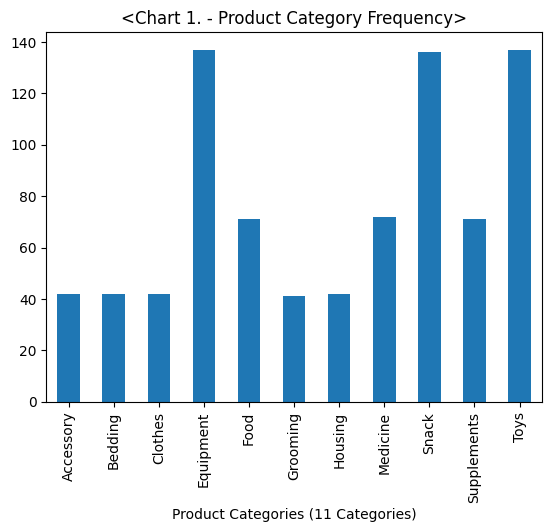

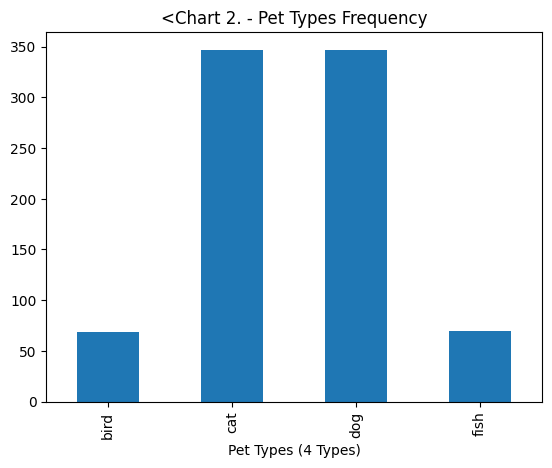

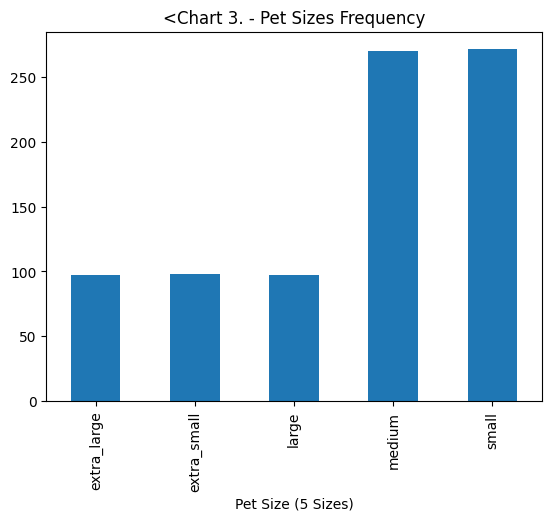

In [37]:
bs.groupby(['product_category'])['product_id'].count().plot(kind='bar')
plt.title('<Chart 1. - Product Category Frequency>')
plt.xlabel('Product Categories (11 Categories)')
plt.show()
bs.groupby(['pet_type'])['product_id'].count().plot(kind='bar')
plt.title('<Chart 2. - Pet Types Frequency')
plt.xlabel('Pet Types (4 Types)')
plt.show()
bs.groupby(['pet_size'])['product_id'].count().plot(kind='bar')
plt.title('<Chart 3. - Pet Sizes Frequency')
plt.xlabel('Pet Size (5 Sizes)')
plt.show()

## 3) Building and Mapping New Attributes for Analysis
   Another is building and mapping new attributes to run the Logistic Regression Model. This study mapped all categorical variables to each dummy variable; Product category, Pet type, and Pet size. We mainly converted pet size data to ordinal variables because we wanted to inspect the distribution of pet size data.

In [97]:
bs['pet_size_n'] = bs['pet_size'].map({'extra_small': 1, 'small':2, 'medium': 3, 'large': 4, 'extra_large': 5})
pet_type_unique = bs.pet_type.unique() # Checking for pet_type unique records
product_category_unique = bs.product_category.unique() # Cheking for product_category unique records
pet_size_unique = bs.pet_size.unique() # Checking for pet_size Unique records

# Built Pet Type Unique record's dummy
for x in pet_type_unique:
    bs[x + '_dummy'] = np.where(bs['pet_type'] == x, 1, 0) # Build Pet Type Dummy
    
# Built Product Category Unique record's dummy
for y in product_category_unique:
    bs[y + '_dummy'] = np.where(bs['product_category'] == y, 1, 0) # Build product Category Dummy
    
# Built Pet size Unique record's dummy
for z in pet_size_unique:
    bs[z + '_dummy'] = np.where(bs['pet_size'] == z, 1, 0) # Build pet size Dummy

print('Dummy Variable Description')
bs.filter(regex='_dummy').describe()

Dummy Variable Description


,fish_dummy,cat_dummy,dog_dummy,bird_dummy,Equipment_dummy,Toys_dummy,Snack_dummy,Supplements_dummy,Bedding_dummy,Medicine_dummy,Housing_dummy,Food_dummy,Clothes_dummy,Accessory_dummy,Grooming_dummy,small_dummy,large_dummy,extra_small_dummy,medium_dummy,extra_large_dummy
count,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.000000,833.00000,833.000000,833.000000,833.00000,833.000000
mean,0.084034,0.416567,0.416567,0.082833,0.164466,0.164466,0.163265,0.085234,0.050420,0.086435,0.050420,0.085234,0.050420,0.050420,0.049220,0.32533,0.116447,0.117647,0.32413,0.116447
std,0.277605,0.493286,0.493286,0.275795,0.370920,0.370920,0.369830,0.279397,0.218942,0.281174,0.218942,0.279397,0.218942,0.218942,0.216456,0.46878,0.320952,0.322383,0.46833,0.320952
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.00000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000


## Data Discovery and Visualization
Describe what you found in the analysis and how the visualizations answer the customer questions in the project brief. In your description you should:
- Include at least two different data visualizations to demonstrate the characteristics of single variables
- Include at least one data visualization to demonstrate the relationship between two or more variables
- Describe how your analysis has answered the business questions in the project brief

# --------------------------------------------------------------------------
# 2. Summary of research
   This study aimed to answer the questions from the client company, which is named PetMind. The main question of the client was what products are more likely to be purchased again for different types of pets. Moreover, the client plans to launch a monthly pet box subscription in three months. Consequently, this study's research purpose is below:
   
   First, test statistical evidence of differences between repurchased and one-time-purchased products. 
   Second, inspect influential determinants of product repurchasing through a statistical model.
   Third, Suggest products that have more probability of repurchasing on the client's new subscription service.

   For these purposes, this study has done the following steps:
   Step. 1: Descriptive Statistic Analysis.
   Step. 2: Mean Comparison Analysis between repurchased and one-time-purchased products.
   Step. 3: Logistic Regression Analysis for repurchased products.

## Client Question Summary.
## Client Question 1: How many products are being purchased more than once?
   
   Answer: 390 products repurchased once or more.

## Client Question 2: Do the products being purchased again have better sales than others?
   
   Answer: There is no statistical evidence about mean sales differences between repurchased and one-time-purchased products.
   
## Client Question 3: What products are more likely to be purchased again for different types of pets?

   Answer: Bedding, Medicine, Food, and Equipment products categories in dogs have a positive probability of purchasing again in subscription service. 

# 3. Descriptive Statistics

## (1) Nominal Data Description
   
   The raw dataset has five nominal data columns; Product ID, Product Category, Vendor ID, Pet Size, and Pet Type. [Table. 1] shows descriptive statistics of all nominal variables. Product ID has a total of 833 records, each unique. Also, Vendor ID has unique 833 records.

In [55]:
# [TABLE 1. - Descriptive Statistics of Nominal Variables]
print('[TABLE 1. - Descriptive Statistics of Nominal Variables]')
print(bs.describe(include=[object]))

[TABLE 1. - Descriptive Statistics of Nominal Variables]
       product_id product_category vendor_id pet_size pet_type
count         833              833       833      833      833
unique        833               11       833        5        4
top          5040        Equipment   VC_1605    small      cat
freq            1              137         1      271      347


Product Category has eleven categories; Accessory, Bedding, Clothes, Equipment, Food, Grooming, Housing, Medicine, Snack, Supplements, and Toys. Toys and Equipment have 137 products, and Snack has 136 products. Refer to < Chart. 4>. 

<Figure size 1000x600 with 0 Axes>

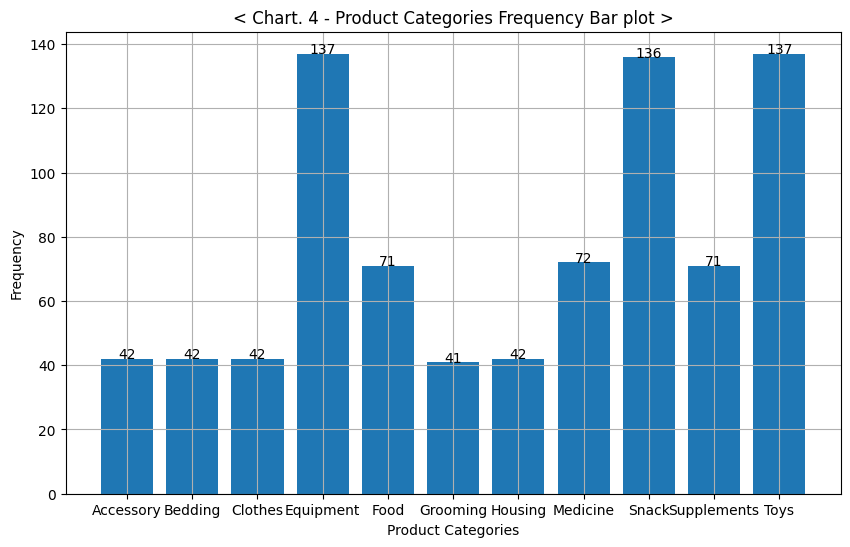

In [39]:
# < Chart. 4 - Product Categories Frequency Bar plot >
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig_bar = plt.figure(figsize=(10,6))
rt = bs.groupby('product_category')['product_id'].count()
name = rt.index
val = rt.values
fig = plt.figure(figsize=(10, 6))
plt.bar(name, val)
addlabels(name, val)
plt.grid(True)
plt.xticks(name)
plt.xlabel('Product Categories')
plt.ylabel('Frequency')
plt.title('< Chart. 4 - Product Categories Frequency Bar plot >')
plt.show()

The Pet size category has five categories; extra small, small, medium, large, and extra large. Over 500 products are small and medium size pet products. The Pet type category has four categories; dogs, cats, fish, and birds. Dog and cat types have 347 products each, bird types have 69 products, and fish have 70 products. < Chart. 5>. 

<Figure size 1000x600 with 0 Axes>

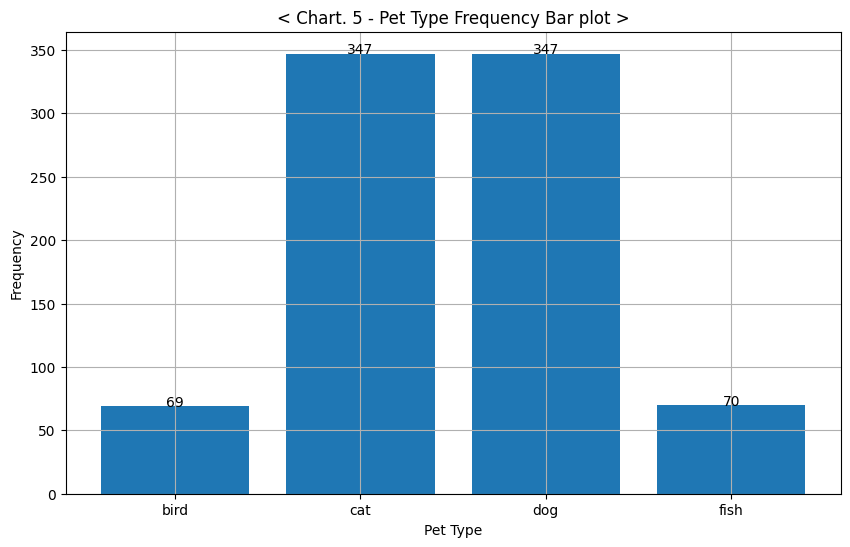

In [40]:
# < Chart. 5 - Pet Type Frequency Bar plot >
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig_bar = plt.figure(figsize=(10,6))
rt = bs.groupby('pet_type')['product_id'].count()
name = rt.index
val = rt.values
fig = plt.figure(figsize=(10, 6))
plt.bar(name, val)
addlabels(name, val)
plt.grid(True)
plt.xticks(name)
plt.xlabel('Pet Type')
plt.ylabel('Frequency')
plt.title('< Chart. 5 - Pet Type Frequency Bar plot >')
plt.show()

   Finally, this study checked products of the repurchased and one-time-purchased categories. According to < Chart. 3 > 390 products are repurchased more than once, while 443 are purchased only once. This result could answer the client's first question: how many products are being purchased more than once? 

<Figure size 1000x600 with 0 Axes>

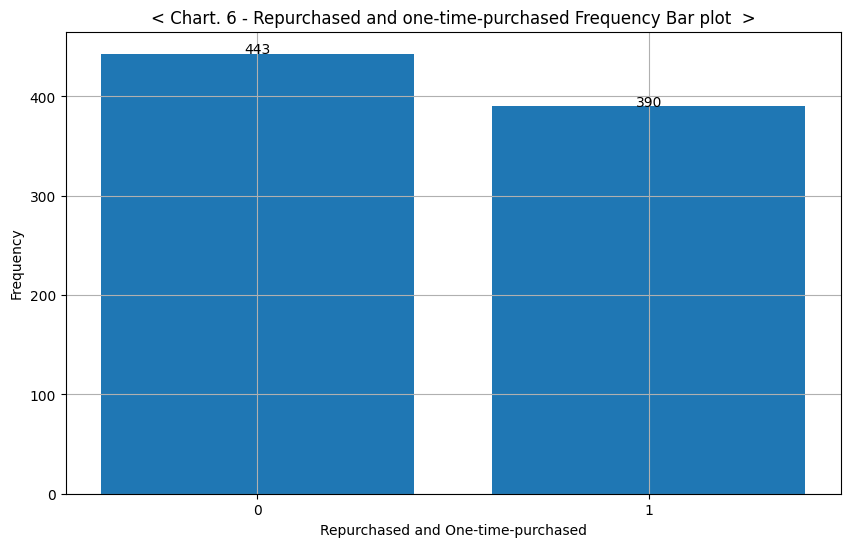

In [41]:
# < Chart. 6 - Repurchased and one-time-purchased Frequency Bar plot >
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

fig_bar = plt.figure(figsize=(10,6))
rt = bs.groupby('re_buy')['product_id'].count()
name = rt.index
val = rt.values
fig = plt.figure(figsize=(10, 6))
plt.bar(name, val)
addlabels(name, val)
plt.grid(True)
plt.xticks(name)
plt.xlabel('Repurchased and One-time-purchased')
plt.ylabel('Frequency')
plt.title('< Chart. 6 - Repurchased and one-time-purchased Frequency Bar plot  >')
plt.show()

## (2) Numeric Data Desciption
   
   The raw dataset has numeric variables. According to the Dataset description, Sales represented the product's sales in dollars last year, and price means that the product's price is in dollars. Lastly, the Rating column contained the customer's rating of the product on a 10-point scale. [Table. 2] shows descriptive statistics of those numeric variables. The mean of sales is 116,100 dollars, meaning that the client's products had an average of 116,110 sales last year. The mean price was approximately 128 dollars, which means the average price of each product. The mean rating is 6.53, which covered customer satisfaction with products was more than the expected average of 5.5 on 10 point scale. 

In [54]:
# [Table. 2 - Descriptive Statistics of Sales, Price, and Rating]
print('[Table. 2 - Descriptive Statistics of Sales, Price, and Rating]')
print(bs[['sales', 'price', 'rating']].describe())

[Table. 2 - Descriptive Statistics of Sales, Price, and Rating]
               sales       price      rating
count     833.000000  833.000000  833.000000
mean   116100.840336  127.994802    6.530612
std     66324.790235   72.552580    2.843572
min      3000.000000    0.350000    1.000000
25%     59000.000000   63.300000    5.000000
50%    116000.000000  129.520000    6.000000
75%    177000.000000  189.250000   10.000000
max    230000.000000  252.690000   10.000000


   This study examined the distribution of each numeric variable to answer the client's second question. <Chart. 7> presented histogram of sales variable. The sales distribution of all data has no normal distribution. Moreover, it looks almost unified distribution. This result means that each product's sales are not concentrated with the mean, and the mean has not meaningful. Thus, division by categories is needed to explore central tendency.

[Text(0.5, 0, 'Sales Bin'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, '<Chart. 7 - Sales Histogram >')]

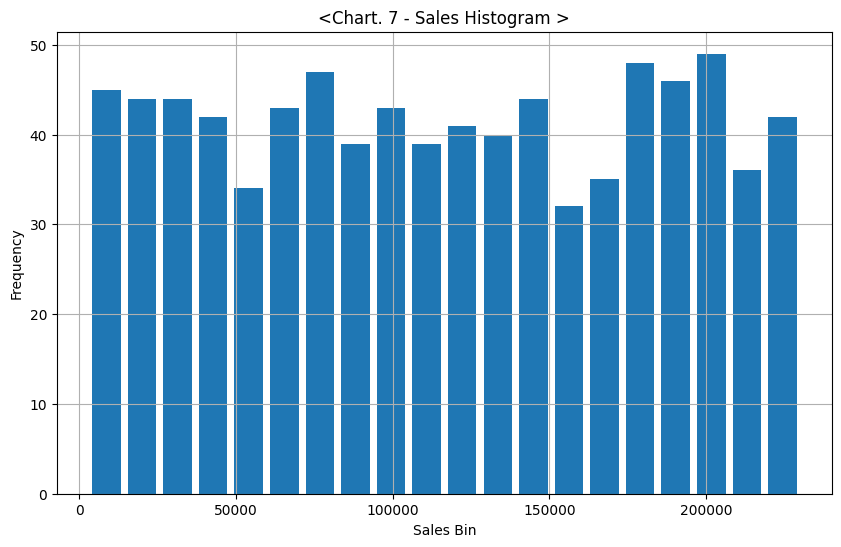

In [44]:
# <Chart. 7 - Sales Histogram >
ax1 = bs.sales.hist(bins=20, rwidth=0.8, figsize=(10,6))
ax1.set(xlabel='Sales Bin', ylabel='Frequency', title='<Chart. 7 - Sales Histogram >')

   Same as the sales variable, the price attribute also looks similar to the distribution. From <Chart. 8>, there are five peaks of frequencies, even though it does not exist around the mean price. In this case, we need to explore price distributions by each category and each pet type.

[Text(0.5, 0, 'Price Bin'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, '<Chart. 8 - Price Histogram >')]

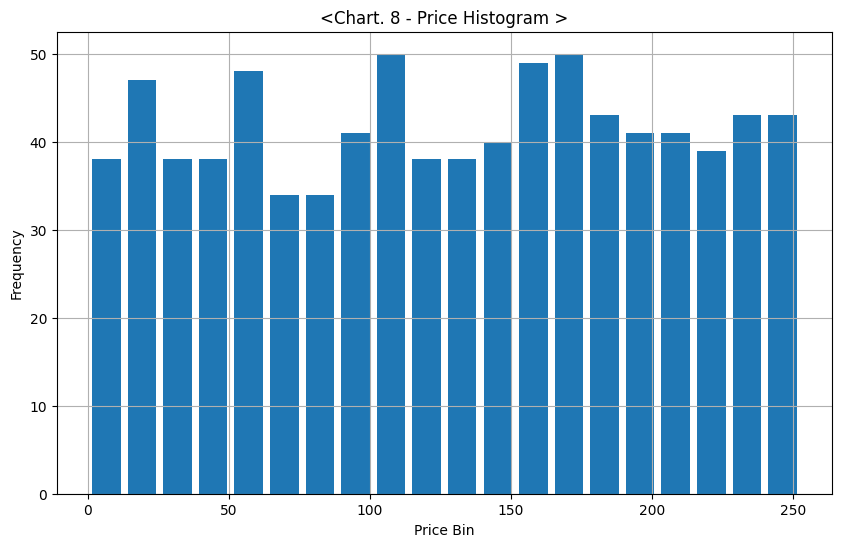

In [45]:
# <Chart. 8 - Price Histogram >
ax2 = bs.price.hist(bins=20, rwidth=0.8, figsize=(10,6))
ax2.set(xlabel = 'Price Bin', ylabel = 'Frequency', title='<Chart. 8 - Price Histogram >')

Lastly, <Chart. 9> shows the distribution of ratings on 10 points scale. This chart has two peaks. One is 6, and another is 10. This result makes us assume that almost all satisfied customers from the products give 10 points, while customers who did not gratify by the products give points lower than 10 points. However, to specify this result, we must examine that classified by each nominal variable. 

<Figure size 1000x600 with 0 Axes>

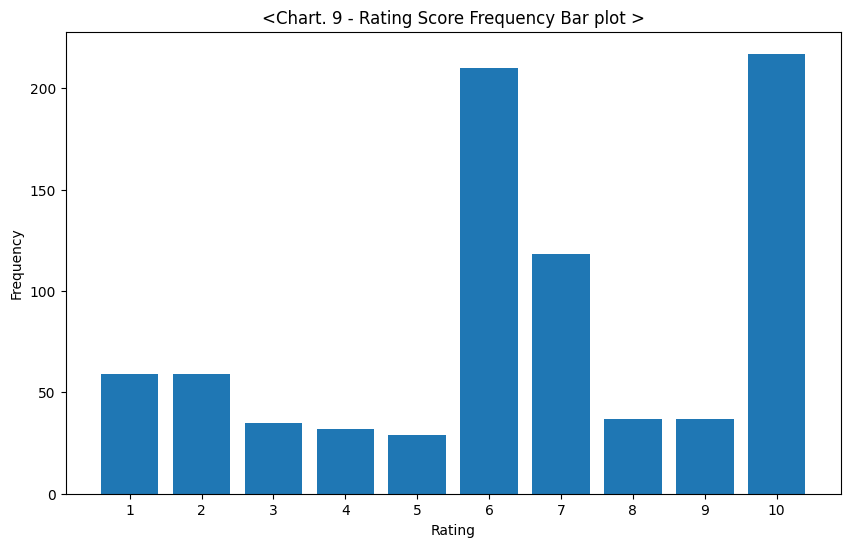

In [46]:
# <Chart. 9 - Rating Score Frequency Bar plot >
fig_bar = plt.figure(figsize=(10,6))
rt = bs.groupby('rating')['product_id'].count()
name = rt.index
val = rt.values
fig = plt.figure(figsize=(10, 6))
plt.bar(name, val)
plt.xticks(name)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('<Chart. 9 - Rating Score Frequency Bar plot >')
plt.show()

## (3) Result of descriptive statistics
   
   By running descriptive statistics, this study examined that dataset validation was well along the client's requirements and explored the distribution of numeric variables. Moreover, this study answered that 390 products were repurchased, facing the client's first question. 
In the next stage, this study explores the datasets grouped by categorical variables and repurchasing status. Through this approach, this study examined the mean comparison test. 

# 4. Mean Comparison between Repurchased and One-time-purchased products

## (1) Mean Comparison for entire sales data.
   
   This study checked sales data by repurchasing status to face the client's second question. The client's question was that the products being purchased again have better sales than others. This study defined hyperthesis below to prove this question:

H.0: The mean sales of repurchased products are equal to or less than those of one-time-purchased products.
H.1: The mean sales of repurchased products are more than those of one-time-purchased products.

This study tested this hypothesis through mean comparison analysis with a t-test.

First, this study compared the mean sales of each repurchase status. The mean of repurchased product sales (re_buy = 1) is 116,890 dollars, while the mean of one-time-purchased product sales (re_buy = 0) is 115,406 dollars. The difference between the two statuses is  1,483 dollars. According to <Chart. 7>, the two group's distribution and mean are almost identical. 

In [48]:
print(bs.groupby('re_buy')['sales'].mean())

re_buy
0    115406.320542
1    116889.743590
Name: sales, dtype: float64


Text(0.5, 1.0, '<Chart. 10 - Mean Sales Box plot grouped by Repurchased Status >')

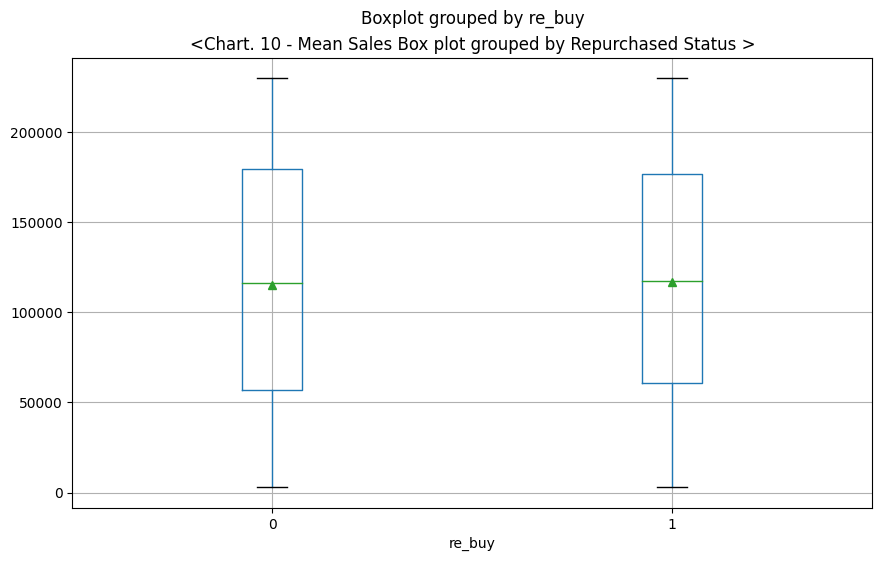

In [49]:
# <Chart. 10 - Mean Sales Box plot grouped by Repurchased Status >
bs.boxplot(column = 'sales', by = 're_buy', grid = True, showmeans=True, figsize=(10, 6))
plt.title('<Chart. 10 - Mean Sales Box plot grouped by Repurchased Status >')

   However, we cannot prove the differences using only the chart. Thus, this study built a statistical model to run a t-test and examined t-statistics and p-values. Before running the t-test, we tested an equal variance test between the two groups. According to the Levene test for equality of variance, F-statistics is 1.413, and the p-value is 0.235, which means that the two groups variances are not equal in p < 0.05 significant level. At last, we examined the t-test based on assumed unequal variance.  
The t-statistics of mean comparisons is 0.322, and the p-value is 0.749, which means that the two groups' mean sales are equal in p < 0.05 significant level. The null hypothesis could not be rejected.
   This result means repurchased products have slightly more sales results than one-time-purchased ones. Nevertheless, this gap is not significant statistically. Consequently, the answer to the client's second question is that there is no statistical difference in mean between repurchased and one-time-purchased products.

## (2) Mean sales comparison between repurchased and one-time-purchased in detail categories.
   
   This study researched the mean of sales between repurchased and one-time-purchased products has no significant difference. On the other hand, the client wanted to figure out what products are more likely to be purchased again for different types of pets. Furthermore, the client wondered which products fit the monthly pet box subscription. To solve these questions, this study investigated which categories of products and types of pets perform more average sales between repurchased and one-time-purchased products.
   First, [Table. 3] results from the mean comparison analysis between repurchased and one-time-purchased products in the pet types category. The repurchased products for the bird have an average of 120,893 dollars more than the one-time-purchased products for the bird. The repurchased products for the cat had an average 116,315 dollars more than the one-time-purchased for it, the repurchased products for the dog had an average 115,218 dollars more than another, and the repurchased products for the fish had an average 126,778 dollars more than one-time-purchased products. However, these mean differences are not statistically significant.    

In [53]:
# [Table 3. - Mean comparison Analysis in pet types.]
tstats = []
pet_type_unique = bs.pet_type.unique()
for x in pet_type_unique:
    inner = []
    tg = bs[bs['pet_type'] == x]
    ix_a = tg['re_buy'] == 1
    inner.append(x) 
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[0])
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[1])
    inner.append(tg['sales'][ix_a].mean() - tg['sales'][~ix_a].mean())
    tstats.append(inner)
t_result = pd.DataFrame(tstats, columns=['pet_type', 't_stat', 'p_value', 'GAP'])
mean_result = bs.groupby(['pet_type','re_buy'])['sales'].mean().reset_index()
mean_result_merged = pd.merge(mean_result, t_result, on=['pet_type'])
print(' [Table 3. - Mean comparison Analysis in pet types.]')
print(mean_result_merged)
# I could not find any statistical evidence that repurchasing items in pet_type makes more sales.

 [Table 3. - Mean comparison Analysis in pet types.]
  pet_type  re_buy          sales    t_stat   p_value          GAP
0     bird       0  118560.975610  0.142569  0.887117  2331.881533
1     bird       1  120892.857143  0.142569  0.887117  2331.881533
2      cat       0  115587.912088  0.100585  0.919939   727.239427
3      cat       1  116315.151515  0.100585  0.919939   727.239427
4      dog       0  113627.118644  0.224365  0.822607  1590.528415
5      dog       1  115217.647059  0.224365  0.822607  1590.528415
6     fish       0  118953.488372  0.484600  0.630013  7824.289406
7     fish       1  126777.777778  0.484600  0.630013  7824.289406


   Second, [Table. 4] shows the result of the mean comparison analysis between repurchased and one-time-purchased products in 11 product categories. According to the result, Accessory, Equipment, Food, and Housing category products purchased more than once had more average sales than one-time-purchased products. On the other hand, Bedding, Clothes, Grooming, Medicine, Snack, and Supplements, purchased more than once, had lower average sales than one-time-purchased products. Moreover, all these gaps were not statistically significant.
Consequently, this study could not find any other statistical evidence about the mean differences between repurchased and one-time-purchased products in every category.

In [56]:
# [Table. 4 - Mean comparison Analysis in product categories.]
tstats = []
product_category_unique = bs.product_category.unique()
for x in product_category_unique:
    inner = []
    tg = bs[bs['product_category'] == x]
    ix_a = tg['re_buy'] == 1
    inner.append(x) 
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[0])
    inner.append(stat.ttest_ind(tg['sales'][ix_a], tg['sales'][~ix_a], equal_var=False)[1])
    inner.append(tg['sales'][ix_a].mean() - tg['sales'][~ix_a].mean())
    tstats.append(inner)
t_result = pd.DataFrame(tstats, columns=['product_category', 't_stat', 'p_value', 'GAP'])
mean_result = bs.groupby(['product_category','re_buy'])['sales'].mean().reset_index()
mean_result_merged = pd.merge(mean_result, t_result, on=['product_category'])
print('[Table. 4 - Mean comparison Analysis in product categories.]')
print(mean_result_merged)

[Table. 4 - Mean comparison Analysis in product categories.]
   product_category  re_buy          sales    t_stat   p_value           GAP
0         Accessory       0  127136.363636  1.096782  0.279358  22563.636364
1         Accessory       1  149700.000000  1.096782  0.279358  22563.636364
2           Bedding       0  125166.666667 -0.043446  0.965571   -875.000000
3           Bedding       1  124291.666667 -0.043446  0.965571   -875.000000
4           Clothes       0  135695.652174 -0.803689  0.426357 -17748.283753
5           Clothes       1  117947.368421 -0.803689  0.426357 -17748.283753
6         Equipment       0  113044.117647  1.121544  0.264082  12463.128730
7         Equipment       1  125507.246377  1.121544  0.264082  12463.128730
8              Food       0  102264.705882  0.305956  0.760567   5086.645469
9              Food       1  107351.351351  0.305956  0.760567   5086.645469
10         Grooming       0  125916.666667 -0.097848  0.922613  -1857.843137
11         Groo

# 5. Logistic Regression Model for Repurchased products.

   At last, this study aimed to inspect the effectiveness of every variable in repurchasing. The repurchasing variable named re_buy has a binomial value, 1 means repurchased, and 0 means one-time-purchased. Therefore, this study designed the Logistic Regression Model that aimed at product repurchased status. This model has a binomial variable (re_buy) as a dependent variable and all other numeric values as independent variables. Furthermore, inspecting the influence of each product category and pet type converted all categorical variables to dummy variables. Finally, the model was designed based on one dependent variable for repurchasing status and 17 independent variables.
Before examining the model, we calculated the correlation matrix between each variable. [Table. 5] shows all correlations between each variable. 
Unfortunately, no variables have a meaningful correlation with repurchasing status.

In [60]:
# [Table. 5 - Correlation Matrix ]
corr = bs.corr() # Check correlations between all numeric values
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
print('[Table. 5 - Correlation Matrix ]')
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(3))

[Table. 5 - Correlation Matrix ]


,sales,price,rating,re_buy,pet_size_n,fish_dummy,cat_dummy,dog_dummy,bird_dummy,Equipment_dummy,Toys_dummy,Snack_dummy,Supplements_dummy,Bedding_dummy,Medicine_dummy,Housing_dummy,Food_dummy,Clothes_dummy,Accessory_dummy,Grooming_dummy,small_dummy,large_dummy,extra_small_dummy,medium_dummy,extra_large_dummy
sales,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
price,0.008,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
rating,0.003,0.057,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
re_buy,0.011,0.061,-0.091,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
pet_size_n,0.008,0.032,0.084,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
fish_dummy,0.027,-0.003,-0.022,-0.050,-0.124,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
cat_dummy,-0.002,-0.012,0.031,0.012,0.152,-0.256,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
dog_dummy,-0.022,-0.009,0.033,0.037,-0.115,-0.256,-0.714,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
bird_dummy,0.015,0.040,-0.093,-0.038,0.059,-0.091,-0.254,-0.254,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
Equipment_dummy,0.022,0.015,-0.097,0.032,-0.045,0.064,-0.040,-0.040,0.078,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


   To solve these despairing situation, this study approached building a statistical model for each pet type. Then finally, this study could find significant insight into the dog category. Our final model included two numeric variables (Price and Rating),10 product type dummy variables (Equipment, Snack, Supplements, Bedding, Medicine, Housing, Food, Clothes, Accessory, and Grooming), and four pet size dummy variables (Extra small, small, medium, and Extra large). According to [Table. 6], model is fitted in p < 0.01 level, and pseudo R-squared is .071. Rating, Bedding dummy, Medicine Dummy, and Food dummy variables are significant in p < 0.05. Price and Equipment Dummy variables are significant in p < 0.1 level. Rating variables have a negative effect on repurchasing status, and it means that higher-rating products have less chance to repurchase. All product category dummy variables have a positive effect on repurchasing status, which means that all variables have more positive rather than the Toys dummy variable, which was the base dummy for avoiding the dummy trap. The significant positive product category is the Bedding category, which has a 1.7962 coefficient, the Medicine category has a 1.1412 coefficient, and the Food category has a 0.9685 coefficient.

In [61]:
# [Tabel. 6 - Logistic Regression Model in Dog products.]
# Define X and Y variables.
feature_cols = [
                # Numeric Variables
                'price', # Price for each product
                'rating', # Rating for each product
                #'pet_size_n', # Ordinal Variable for pet size 
                # ------------------------------------- Product Category Dummy
                'Equipment_dummy', 
                #'Toys_dummy', 
                'Snack_dummy',
                'Supplements_dummy', 
                'Bedding_dummy', 
                'Medicine_dummy',
                'Housing_dummy', # Generally housing is not purchasing more than once.
                'Food_dummy', 
                'Clothes_dummy', 
                'Accessory_dummy', 
                'Grooming_dummy', #is Base Dummy. Avoiding Dummy Trap
                # -------------------------------------- Pet Size Dummy
                'extra_small_dummy',
                'small_dummy',
                'medium_dummy',
                #'large_dummy',
                'extra_large_dummy'
               ]
det = bs[bs['pet_type'] == 'dog']
X = det[feature_cols] # Independent Variables dataset
y = det.re_buy # Dependent Variable

x_sm = sm.add_constant(X)
logit_model = sm.Logit(y, x_sm)
result = logit_model.fit(method = 'ncg')
print('[Tabel. 6 - Logistic Regression Model in Dog products.]')
print(result.summary2()) # Checking Coefficients and P-Values and Model Evaluation

# Rating, Bedding_Dummy, Medicine_Dummy, and Food_Dummy are significant in p < 0.05 level.
# Price and Equipment_Dummy are significant in p < 0.1 Level.
# Model's p-value is significant in p < 0.01 level.
# Peudo R-squared: 0.071.

Optimization terminated successfully.
         Current function value: 0.643619
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Hessian evaluations: 10
[Tabel. 6 - Logistic Regression Model in Dog products.]
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.071    
Dependent Variable:  re_buy           AIC:              480.6715 
Date:                2023-01-03 21:50 BIC:              546.1100 
No. Observations:    347              Log-Likelihood:   -223.34  
Df Model:            16               LL-Null:          -240.45  
Df Residuals:        330              LLR p-value:      0.0050560
Converged:           1.0000           Scale:            1.0000   
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             -0.2072   0.5531 -0.3

# 6. Conclusions
   
   This study analyzed which product categories and pet types affected repurchasing by designing a logistic regression model for the repurchasing status binomial variable as a dependent variable. Furthermore, this study examined the statistical mean of sales amount differences between repurchased and one-time-purchased products. As a consequence, there is no difference between repurchased and one-time-purchased products in average sales statistically. On the other hand, the logistic regression model could prove that some product categories positively affected repurchasing products for dogs. 
   Based on the above result, this study suggests some products that are more likely to be purchased again in a new subscription service. 
   Bedding, Medicine, Food, and Equipment products categories in dogs product seem to have a positive probability of purchasing again in subscription service. Specifically, [Table. 7] represented 137 products to suggest new subscription services. 
   Before picking products, however, this study strongly recommends considering about rating points of each product. The customer highly rates some products, but others have lower rating points even though they had been repurchased. This study could not cover the in-depth analysis of these phenomena because lack of data. The client needs to check the products which have lower rating points but has repurchased records. Moreover, check the products with higher rating points but were not repurchased. These data assume that some products provided higher satisfaction to the customer but were optional to repurchase, such as Bedding products that only use in winter. Other products gave customers lower quality, but customers needed help finding substitute goods quickly, such as food products only sold by PetMind.

In [66]:
# [Tabel. 7] Suggested products list for subscription service.
# Bedding_Dummy, Medicine_Dummy, Food_Dummy, Equipment_Dummy for dog product

final = bs[(bs['pet_type'] == 'dog') & (
                                (bs['product_category'] == 'Bedding') 
                                 | (bs['product_category'] == 'Medicine')
                                 | (bs['product_category'] == 'Food')
                                 | (bs['product_category'] == 'Equipment')
                               )]
print('[Tabel. 7] Suggested products list for subscription service.')
print(final[['product_id', 'product_category', 'rating', 're_buy']].sort_values(by=['rating', 'product_category'], ascending=[False, True]))

[Tabel. 7] Suggested products list for subscription service.
    product_id product_category  rating  re_buy
237       4576          Bedding      10       0
640       4598          Bedding      10       1
728       4620          Bedding      10       1
790       4378          Bedding      10       1
801       4642          Bedding      10       1
..         ...              ...     ...     ...
739       4842        Equipment       1       1
717       4484             Food       1       0
267       4370         Medicine       1       1
286       4502         Medicine       1       1
378       4348         Medicine       1       0

[137 rows x 4 columns]


## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam